In [2]:
import pandas as pd
divorce = pd.read_csv('data/Marriage_Divorce_DB.csv')

In [3]:
divorce.head()

,Age Gap,Education,Economic Similarity,Social Similarities,Cultural Similarities,Social Gap,Common Interests,Religion Compatibility,No of Children from Previous Marriage,Desire to Marry,...,Addiction,Loyalty,Height Ratio,Good Income,Self Confidence,Relation with Non-spouse Before Marriage,Spouse Confirmed by Family,Divorce in the Family of Grade 1,Start Socializing with the Opposite Sex Age,Divorce Probability
0,0.111633,1.915111,10.998678,76.456065,47.847460,50.317656,88.099898,83.738075,4.402822,22.868019,...,3.134119,49.648480,30.822948,94.499164,45.964824,2.032610,1.719332,2.262242,24.356772,2.760190
1,3.355384,2.957842,82.138120,48.656031,30.188517,54.114612,57.020971,98.408133,4.367024,40.336843,...,2.067377,75.220699,68.268221,41.102605,65.387715,1.053402,1.456192,9.795998,19.667152,1.962979
2,6.527365,2.772463,26.337826,59.356238,10.340252,76.595377,80.590985,41.743462,1.197120,45.941845,...,3.599095,22.551866,59.134874,23.053577,84.271897,8.268308,7.095241,9.986173,15.522517,2.858803
3,5.203075,1.729242,66.956033,5.472612,1.003407,55.071435,99.718078,70.493011,3.392041,2.924863,...,1.549274,99.172136,40.984117,43.400040,96.081229,5.852371,6.570749,5.099396,34.665933,1.404621
4,6.864962,4.370290,76.245035,26.797234,93.291581,73.736241,52.896199,11.729729,2.373553,89.851492,...,4.031738,21.629472,89.122381,51.615509,53.330824,9.717223,7.609152,1.294295,22.545763,1.318819


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression             
from sklearn.model_selection import train_test_split      
from sklearn.linear_model import LinearRegression         
from sklearn.metrics import mean_squared_error, r2_score 

In [7]:
def plot_preds(y_true, y_pred, title):
    plt.figure()
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.show()


In [11]:
correlations = divorce.corr()['Divorce Probability'].drop('Divorce Probability')
sorted_corr = correlations.sort_values(ascending=False)

top_10_features = sorted_corr.head(10).index.tolist()
bottom_10_features = sorted_corr.tail(10).index.tolist()
print(top_10_features)
print(bottom_10_features)

['Addiction', 'Love', 'Age Gap', 'Mental Health', 'Independency', 'Relation with Non-spouse Before Marriage', 'Loyalty', 'Spouse Confirmed by Family', 'Divorce in the Family of Grade 1', 'Social Gap']
['Common Interests', 'The Sense of Having Children', 'Desire to Marry', 'The Proportion of Common Genes', 'Previous Trading', 'Relationship with the Spouse Family', 'Social Similarities', 'Start Socializing with the Opposite Sex Age ', 'Good Income', 'Education']


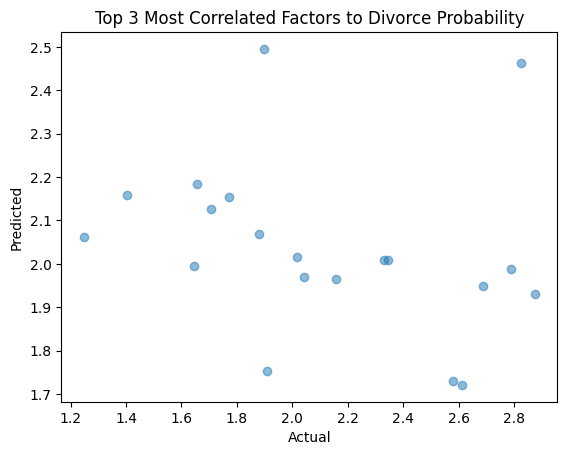

In [8]:
## plot with only top 3 most correlated on Divorce Probability:
x = divorce[['Addiction', 'Love', 'Age Gap', 'Mental Health', 'Independency', 'Relation with Non-spouse Before Marriage', 'Loyalty', 'Spouse Confirmed by Family', 'Divorce in the Family of Grade 1', 'Social Gap']]
y = divorce['Divorce Probability']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred_top3= model.predict(x_test)
plot_preds(y_test, y_pred_top3, 'Top 3 Most Correlated Factors to Divorce Probability')


In [63]:
r2_top3 = r2_score(y_test, y_pred_top3)
mse_top3 = mean_squared_error(y_test, y_pred_top3)
print(f'r2: {r2_top3}\n mse: {mse_top3}')

r2: -0.3276364043032345
 mse: 0.3024727806328768


In [12]:
wo_bottom3 = divorce.drop(columns = ['Common Interests', 'The Sense of Having Children', 'Desire to Marry', 'The Proportion of Common Genes', 'Previous Trading', 'Relationship with the Spouse Family', 'Social Similarities', 'Start Socializing with the Opposite Sex Age ', 'Good Income', 'Education'])

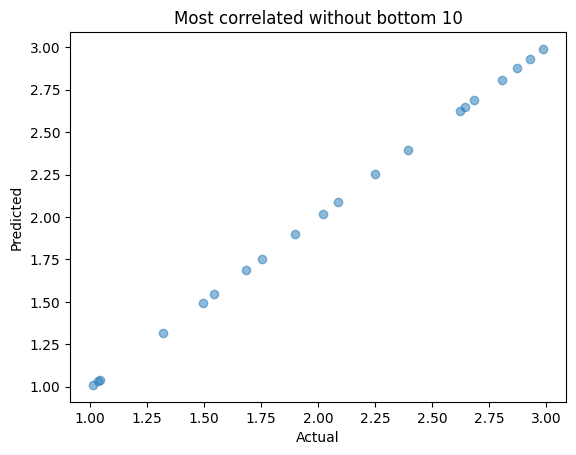

In [18]:
x_train, x_test, y_train, y_test = train_test_split(wo_bottom3, y, test_size = 0.2)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
plot_preds(y_test, y_pred, 'Most correlated without bottom 10')

In [17]:
x_all = divorce.drop(columns = ['Divorce Probability'])

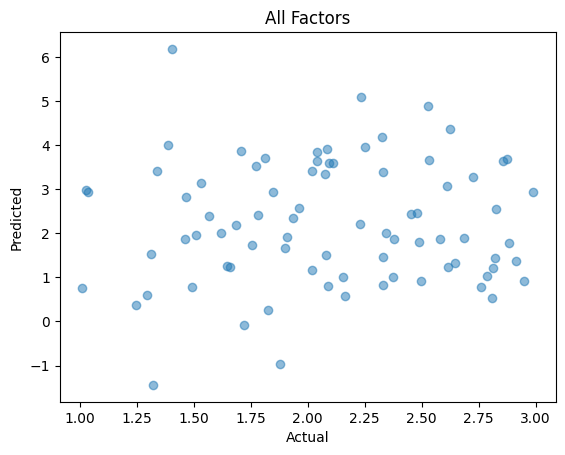

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_all, y, test_size = 0.8, random_state = 23)
model_all = LinearRegression()
model_all.fit(x_train, y_train)

y_pred = model_all.predict(x_test)
plot_preds(y_test, y_pred, 'All Factors')